<a href="https://colab.research.google.com/github/Vey27/Deep-Learning-and-Computer-Vision/blob/main/Performance_Tuning_Deep_Learning_Models_Weight_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Another potential issue is that the model may not be optimized for performance, and there may be ways to improve the accuracy of the model while reducing the number of epochs needed for training. Performance tuning can be done by experimenting with different hyperparameters, such as the learning rate, batch size, and number of hidden layers and neurons. Additionally, other types of regularization techniques, such as dropout or early stopping, can also be tried.



Train: 1.000, Test: 0.914


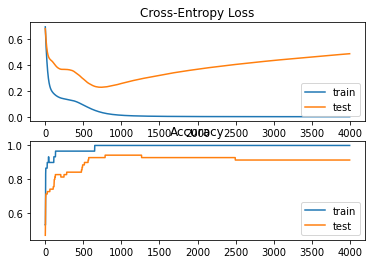

In [1]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

#before trianing the model split insto training sets 70/30
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

#define the model linear function Sequential, 500 nodes, 

model = Sequential()
#model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001))) # removed kernel otherwise all codes remain the samee
model.add(Dense(500, input_dim=2, activation='relu')) # one hidden layer with more node than is required to solve the problems, and longer training time. 
model.add(Dense(1, activation='sigmoid')) # output layer predict the class value 01
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # optimize using 'binary_crossentropy' function, effiecient 'adam' of gradient descent 

history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0) # training model at 4000 epochs and fault default size of 32

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0) # using test dataset as validation model performance and report the results
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In this model it has better performance than in the training dataset 1.o test .91. Possble sign of overfitting. Cross-entropy loss show overfitting. 

Now lets work on MLP model by adding weight regularization to the hidden layer to reduce the overfitting of the model. Using L2 vector norm lambdia of 0.001. Done by adding kernel_regularizer. 

Param: 0.000001, Train: 1.000, Test: 0.943


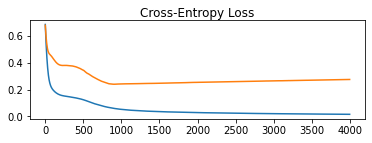

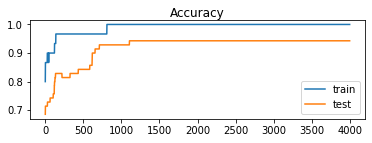

In [2]:
from prompt_toolkit.shortcuts.dialogs import Label
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001))) # lambdia .001
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
 #add
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
 
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend
pyplot.show()

pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


No change in the accuracy, the learning curve plato indicating model no longer overfitting the dataset. 

Param: 0.100000, Train: 0.967, Test: 0.829
Param: 0.010000, Train: 1.000, Test: 0.943
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.914
Param: 0.000001, Train: 1.000, Test: 0.914


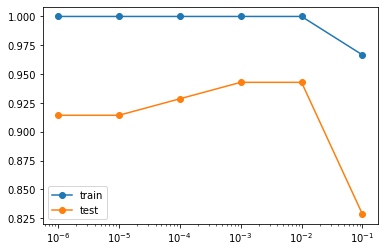

In [3]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6] #grid search 
all_train, all_test = list(), list()
for param in values:
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=4000, verbose=0)
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)

pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

The grid search regularization, test the value.
In this result suggest that .01 or .001 is sufficient. 
Line is showing the increase in the test accuracy wider. Increase larger value
drop in both train and test values. 
